In [14]:
# Import libraries

import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import differential_evolution
from joblib import Parallel, delayed

# 2HDM with $Z_2$ symmetry

In [15]:
dim = 1000 # Number of (pseudo-)random numbers.

# The idea is to generate some (pseudo-)random numbers so as to find which combination is valid, in light of the analysis presented in the Master' Thesis associated with this code.

rho_3 = np.random.default_rng().uniform(-5,5,dim) # Only values from -5 to 5 are studied here. This parameter can be changed as desired.

rho_4 = np.random.default_rng().uniform(-5,5,dim) # Only values from -5 to 5 are studied here. This parameter can be changed as desired.

rho_5 = np.random.default_rng().uniform(0,5,dim) # rho_5 is |rho_5|, a modulus. Hence, its values cannot be smaller than zero. 
                                                 # Nevertheless, the code might also arise valid results if the minimun is changed to a negative value.

gamma = np.random.default_rng().uniform(0,2*np.pi,dim) # Phase of rho_5.

In [16]:
def search_minimum_values(rho_3_param,rho_4_param,rho_5_param,dim_parameter,epsilon):

    # This function finds the valid values for the parameters of the 2HDM potential.

    r2 = np.linspace(0,1,200) # r2 is r^2, which takes values from 0 to 1.
    cosine_gamma_plus_beta = np.linspace(-1,1,200) # cosine_gamma_plus_beta is cos(γ+β), whose values vary from -1 to 1.
    x = np.linspace(0,5,200) # Only the first quadrant is studied. The upper limit (5 for this quadrant) and the number of points (200) can be changed.
    y = np.linspace(0,5,200) # Only the first quadrant is studied. The upper limit (5 for this quadrant) and the number of points (200) can be changed.
    #
    rho_3_eff_min_valid = []
    rho_3_eff = np.zeros((len(r2),len(cosine_gamma_plus_beta)))
    rho_3_eff_min = np.zeros(dim_parameter)
    #
    for k in range(0,dim_parameter):
        #
        for i in range(0,len(r2)):
            for j in range(0,len(cosine_gamma_plus_beta)):
                rho_3_eff[i,j] = rho_3_param[k]+r2[i]*(rho_4_param[k]+rho_5_param[k]*cosine_gamma_plus_beta[j])
        #
        rho_3_eff_min[k] = np.min(rho_3_eff)
        V = (1/2)*x**2+(1/2)*y**2+rho_3_eff_min[k]*x*y
        #
        if np.min(V) >= -epsilon: ##The minus sign is to include 0.
            rho_3_eff_min_valid.append([float(rho_3_param[k]),float(rho_4_param[k]),float(rho_5_param[k]),float(rho_3_eff_min[k])])
            
            # It is possible to use the following code in order to work with np.float64:
            # rho_3_eff_min_valid.append([rho_3_param[k],rho_4_param[k],rho_5_param[k],rho_3_eff_min[k]])
    #
    if not rho_3_eff_min_valid == []:
        return rho_3_eff_min_valid # First element: rho_3, Second element: rho_4, Third element: |rho_5|, Fourth element: rho_3_eff_min.
    else:
        return print('No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.')

In [17]:
# Results

valid_values = search_minimum_values(rho_3,rho_4,rho_5,dim,10**(-5))
valid_values

[[2.8512407687260897,
  1.9715070232705658,
  1.9905421679743869,
  2.8322056240222686],
 [4.138911362093683, 3.8656472880360013, 3.211808327165131, 4.138911362093683],
 [4.134039576117399, 2.331862849263376, 1.0362378503639875, 4.134039576117399],
 [3.4651291294147146,
  4.550401701801446,
  2.705025998390371,
  3.4651291294147146],
 [4.092036479735231, 1.9573180771485603, 3.84212347594419, 2.207231080939602],
 [4.016010532515772,
  -0.391473133747855,
  3.2320638958800036,
  0.39247350288791294],
 [4.764226399896202, 2.0706947051223024, 4.81194229239649, 2.0229788126220143],
 [0.23209561649235866,
  4.852213377722698,
  0.6798283336125949,
  0.23209561649235866],
 [1.239924153804461,
  0.7325228123874776,
  0.3998227642570801,
  1.239924153804461],
 [4.221426676080773, 3.609597551577062, 1.5041221231511115, 4.221426676080773],
 [2.623997399787349, 4.993130391139653, 3.568160839560795, 2.623997399787349],
 [3.4975333139220606,
  0.9450698959689046,
  3.2440083804912834,
  1.1985948293

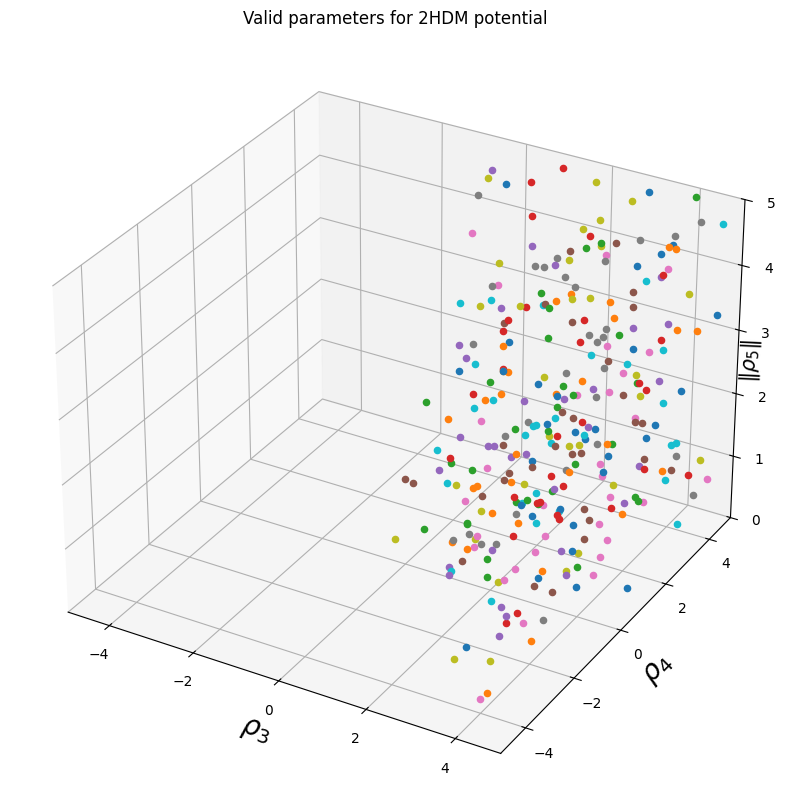

In [43]:
# Plot of the results

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(valid_values)-1,len(valid_values)):
    #
    ax.scatter(valid_values[int(point)][0],valid_values[int(point)][1],valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_zlabel(r'$\|\rho_{5}\|$',fontsize=15, rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title('Valid parameters for 2HDM potential')

plt.show()

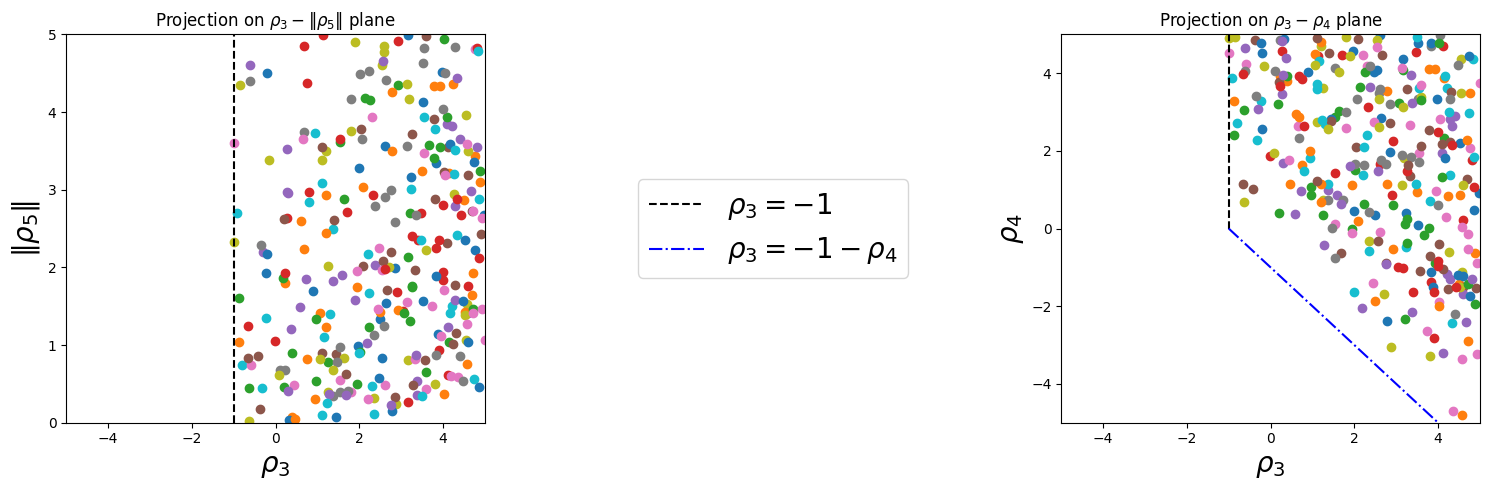

In [44]:
# Projection on different planes

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)

for point in np.linspace(0, len(valid_values)-1, len(valid_values)):
    ax.scatter(valid_values[int(point)][0], valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\rho_{3}-\|\rho_{5}\|$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(133)

for point in np.linspace(0, len(valid_values)-1, len(valid_values)):
    ax.scatter(valid_values[int(point)][0], valid_values[int(point)][1])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_title(r'Projection on $\rho_{3}-\rho_{4}$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax2 = fig.add_subplot(132)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center',fontsize=20)
ax2.axis('off')


plt.tight_layout()
plt.show()

In [20]:
# Check!

search_minimum_values([0],[0],[0],1,10**(-5))

# As rho_3=rho_4=rho_5=0, then rho_3_eff_min=0, which is greater than -1, so this values are valid (Hence, they are shown hereinbelow).

[[0.0, 0.0, 0.0, 0.0]]

In [21]:
# Check!

search_minimum_values([-2],[0],[0],1,10**(-5))

# As rho_3=-2 and rho_4=rho_5=0, then rho_3_eff_min=-2, which is NOT greater than -1, so this values are NOT valid (Error message arises).

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.


In [22]:
# Check!

search_minimum_values([1],[0],[0],1,10**(-5))

# As rho_3=1 and rho_4=rho_5=0, then rho_3_eff_min=1, which is greater than -1, so this values are valid (Hence, they are shown hereinbelow).

[[1.0, 0.0, 0.0, 1.0]]

# 2HDM without $Z_2$ symmetry

In [23]:
dim = 100

# Same parameters as above.

rho_3 = np.random.default_rng().uniform(-5,5,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)

rho_6 = np.random.default_rng().uniform(0,5,dim) # rho_6 is |rho_6|, a modulus. Hence, its values cannot be smaller than zero. 
                                                 # Nevertheless, the code might also arise valid results if the minimun is changed to a negative value.

alpha = np.random.default_rng().uniform(0,2*np.pi,dim) # Phase of rho_6.

rho_7 = np.random.default_rng().uniform(0,5,dim) # rho_7 is |rho_7|, a modulus. Hence, its values cannot be smaller than zero. 
                                                 #Nevertheless, the code might also arise valid results if the minimun is changed to a negative value.

xi = np.random.default_rng().uniform(0,2*np.pi,dim) # Phase of rho_7.

In [24]:
def search_minimum_values_for_Z2_violating_2HDM(rho_3_param,rho_4_param,rho_5_param,gamma_param,rho_6_param,alpha_param,rho_7_param,xi_param,dim_param,epsilon_2):

    # The idea here is similar to the previous one but with much more parameters.

    r = np.linspace(0,1,50)
    beta = np.linspace(0,4*np.pi,50)
    chi = np.linspace(0,np.pi/2,50)
    #
    minimum_for_all = []
    V = np.zeros((len(r),len(beta),len(chi)))
    #
    for k in range(0,dim_param):
        #
        for i in range(0,len(r)):
            for j in range(0,len(beta)):
                for w in range(0,len(chi)):
                    V[i,j,w] = 2+((rho_3_param[k]+r[i]**2*(rho_4_param[k]+np.abs(rho_5_param[k])*np.cos(gamma_param[k]+beta[j])))-1)*(np.sin(2*chi[w]))**2+np.sin(2*chi[w])*(np.abs(rho_6_param[k])*r[i]*np.cos(alpha_param[k]+(1/2)*beta[j])+np.abs(rho_7_param[k])*r[i]*np.cos(xi_param[k]+(1/2)*beta[j])+np.cos(2*chi[w])*(np.abs(rho_6_param[k])*r[i]*np.cos(alpha_param[k]+(1/2)*beta[j])-np.abs(rho_7_param[k])*r[i]*np.cos(xi_param[k]+(1/2)*beta[j])))
        #
        if np.min(V) >= -epsilon_2:
            minimum_for_all.append([float(rho_3_param[k]),float(rho_4_param[k]),float(rho_5_param[k]),float(gamma_param[k]),float(rho_6_param[k]),float(alpha_param[k]),float(rho_7_param[k]),float(xi_param[k]),float(np.min(V))])
            
             # It is possible to use the following code in order to work with np.float64:
             # minimum_for_all.append([rho_3_param[k],rho_4_param[k],rho_5_param[k],gamma_param[k],rho_6_param[k],alpha_param[k],rho_7_param[k],xi_param[k],np.min(V)])
    #
    if not minimum_for_all == []:
        return minimum_for_all
    else:
        return print('No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.')
    

In [25]:
# Results

search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))

[[4.340227749205978,
  2.7971546826546554,
  2.735186627164194,
  4.972960481129237,
  1.848811289972312,
  3.952581967760912,
  2.7783433418935726,
  5.818761223668389,
  1.1450986635688991],
 [0.5922431388858662,
  3.3178810236554206,
  4.365903038449358,
  5.392333611389364,
  0.29052805116871305,
  0.911483893585009,
  0.7491812957880217,
  2.5057067341029837,
  0.13234540132758904],
 [3.146459362070571,
  0.27885673166471925,
  1.7177947563839924,
  2.429518841461005,
  2.471188290668497,
  1.462668776495354,
  2.6673256670279315,
  4.796021528682496,
  0.38434762808178036],
 [3.2174433365596062,
  4.0061005323787775,
  0.8502792270610621,
  3.749630419913906,
  1.8405835354968259,
  4.700576658858482,
  0.36099611393315245,
  0.7560773099467208,
  1.527070412020581],
 [4.736946867598636,
  0.7565187576815955,
  3.883333961599846,
  1.3301348969562994,
  0.8857173475943098,
  4.793373190343851,
  2.397722745199033,
  0.14415247219564178,
  0.3558168224986935],
 [1.9808559629636582

In [26]:
# Check!

search_minimum_values_for_Z2_violating_2HDM([0],[0],[0],[0],[0],[0],[0],[0],1,10**(-5))

# Same case as search_minimum_values([0],[0],[0],1,10**(-5))

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0010273036248318]]

In [27]:
# Check!

search_minimum_values_for_Z2_violating_2HDM([-2],[0],[0],[0],[0],[0],[0],[0],1,10**(-5))

# Same case as search_minimum_values([-2],[0],[0],1,10**(-5))

# NOTE: This code might consider rho_3=-1 as a valid value because it is a limit case

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.


In [28]:
# Check!

search_minimum_values_for_Z2_violating_2HDM([1],[0],[0],[0],[0],[0],[0],[0],1,10**(-5))

# Same case as search_minimum_values([1],[0],[0],1,10**(-5))

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0]]

In [29]:
# Due to the fact that this method implies a heavy calculation, another method is presented below.

name_parameter = ['rho_3', 'rho_4', 'rho_5', 'gamma', 'rho_6', 'alpha', 'rho_7', 'xi']
name_function_variables = ['r', 'beta', 'chi']
num_parameter = len(name_parameter)
num_functiion_variables = len(name_function_variables)


function_variable_regions = [(0, 1),         # r
                             (0, 4*np.pi),   # beta
                             (0, np.pi/2)]   # chi

def generate_random_params(number, limits):

    limits = np.array(limits)  
    lower_limit = limits[:, 0]  
    upper_limit = limits[:, 1]  

    return np.random.uniform(lower_limit, upper_limit, size=(number, len(limits)))

# Define the Z2-violating potential
def V_Z2_less(parameters, function_variables):
    rho_3_param, rho_4_param, rho_5_param, gamma_param, rho_6_param, alpha_param, rho_7_param, xi_param = parameters
    r, beta, chi = function_variables
    return 2+((rho_3_param+r**2*(rho_4_param+np.abs(rho_5_param)*np.cos(gamma_param+beta)))-1)*(np.sin(2*chi))**2+np.sin(2*chi)*(np.abs(rho_6_param)*r*np.cos(alpha_param+(1/2)*beta)+np.abs(rho_7_param)*r*np.cos(xi_param+(1/2)*beta)+np.cos(2*chi)*(np.abs(rho_6_param)*r*np.cos(alpha_param+(1/2)*beta)-np.abs(rho_7_param)*r*np.cos(xi_param+(1/2)*beta)))

# Minimize the potential in (r, beta, chi) space
def minimize_dependent_params(parameters, bounds):
    def minimize_single(parameter):
        def objective(function_variables):
            return V_Z2_less(parameter, function_variables)
        
        # Scipy native function
        res = differential_evolution(objective, bounds=bounds, strategy='best1bin', tol=1e-6)
        return np.concatenate([parameter, res.x, [res.fun]])

    # Parallel processing
    results = Parallel(n_jobs=-1)(delayed(minimize_single)(parameter) for parameter in parameters)
    
    return results

In [30]:
# We first test this method for the Z_2-conserving potential

dim = 10000

regions = [(-5, 5),         # rho_3
           (-5, 5),         # rho_4
           (0, 5),          # |rho_5|
           (0, 2*np.pi),    # gamma
           (0, 0),          # |rho_6|
           (0, 0),    # alpha
           (0, 0),          # |rho_7|
           (0, 0)]    # xi

# Generate random parameters
parameters = generate_random_params(dim, regions)

# Minimize the function and filter the results with V > 0
results = np.array(minimize_dependent_params(parameters, function_variable_regions))
new_valid_values = results[results[:, -1] > 0]

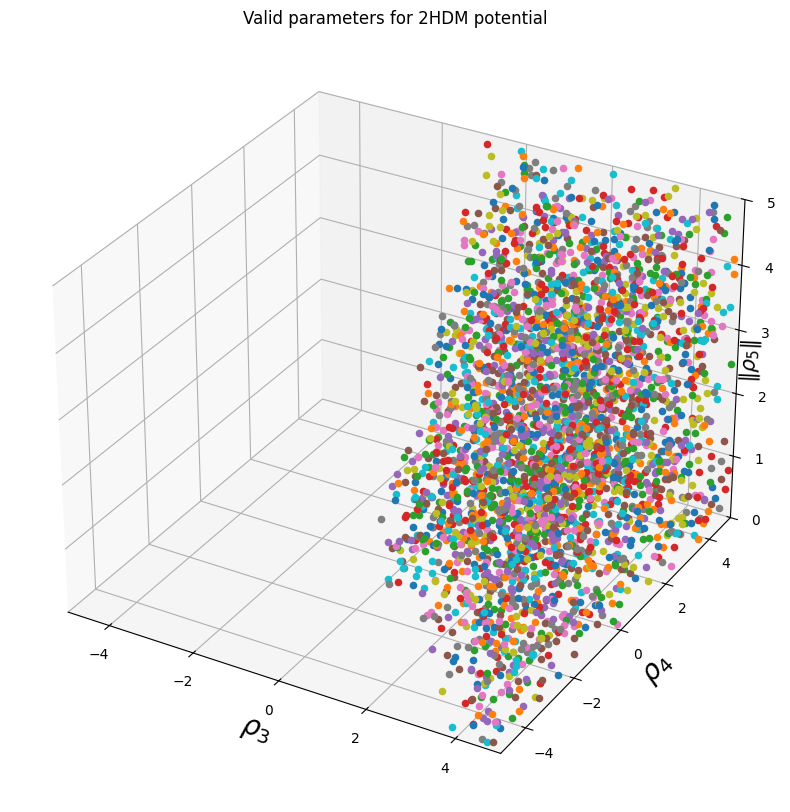

In [31]:
# Plot of the results


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(new_valid_values)-1,len(new_valid_values)):
    #
    ax.scatter(new_valid_values[int(point)][0],new_valid_values[int(point)][1],new_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_zlabel(r'$\|\rho_{5}\|$',fontsize=15, rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title('Valid parameters for 2HDM potential')

plt.show()

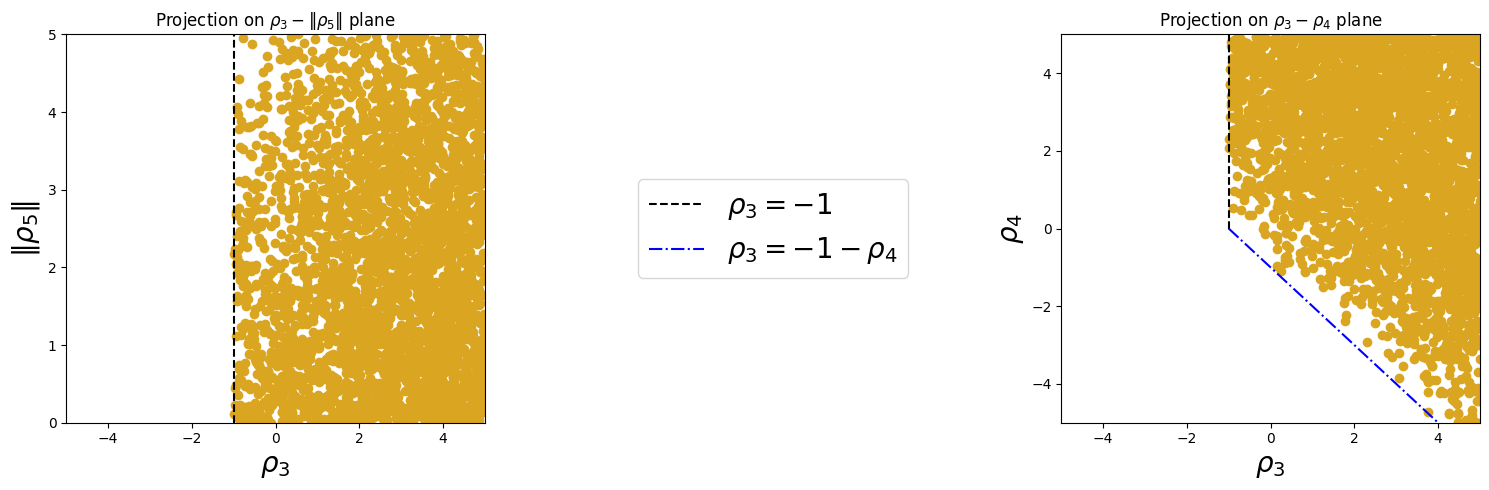

In [32]:
# Projection on different planes

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)

ax.scatter(new_valid_values[:,0], new_valid_values[:,2],color='goldenrod')

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\rho_{3}-\|\rho_{5}\|$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(133)

ax.scatter(new_valid_values[:,0], new_valid_values[:,1],color='goldenrod')

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_title(r'Projection on $\rho_{3}-\rho_{4}$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax2 = fig.add_subplot(132)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center',fontsize=20)
ax2.axis('off')


plt.tight_layout()
plt.show()

In [33]:
# Explore Z_2-violating 2HDM results

dim = 10000

regions = [(-5, 5),         # rho_3
           (-5, 5),         # rho_4
           (0, 5),          # |rho_5|
           (0, 2*np.pi),    # gamma
           (0, 5),          # |rho_6|
           (0, 2*np.pi),    # alpha
           (0, 5),          # |rho_7|
           (0, 2*np.pi)]    # xi

# Generate random parameters
parameters = generate_random_params(dim, regions)

# Minimize the function and filter the results with V > 0
results = np.array(minimize_dependent_params(parameters, function_variable_regions))
Z2_violating_valid_values = results[results[:, -1] > 0]

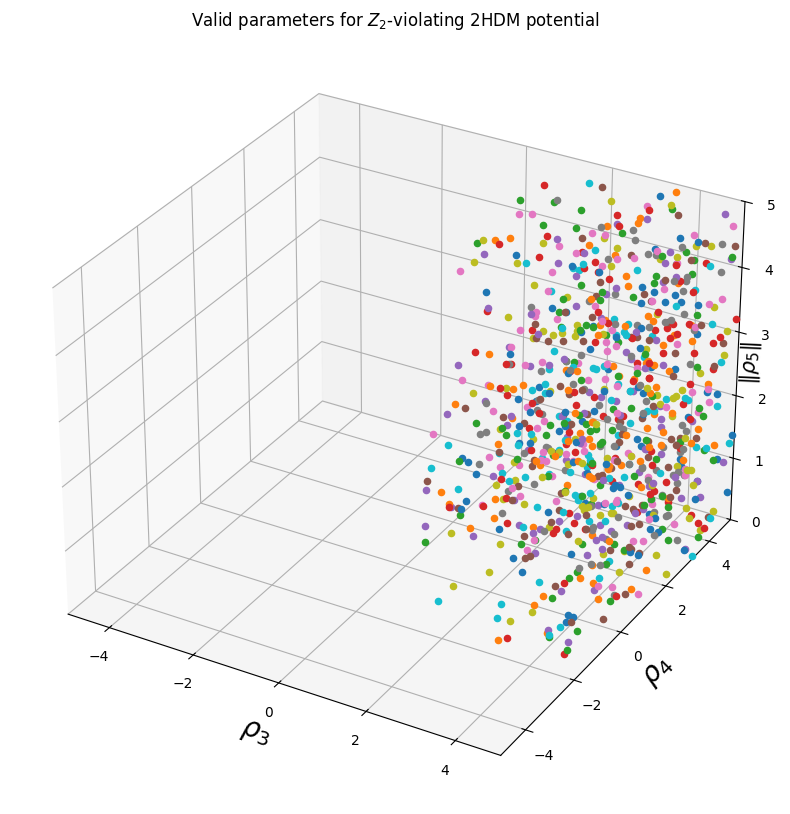

In [34]:
# Plot of the results
# Even though in this example all the parameters are studied at once, only the region rho_3, rho_4, rho_5 is shown.

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(Z2_violating_valid_values)-1,len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0],Z2_violating_valid_values[int(point)][1],Z2_violating_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_zlabel(r'$\|\rho_{5}\|$',fontsize=15, rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title(r'Valid parameters for $Z_2$-violating 2HDM potential')

plt.show()

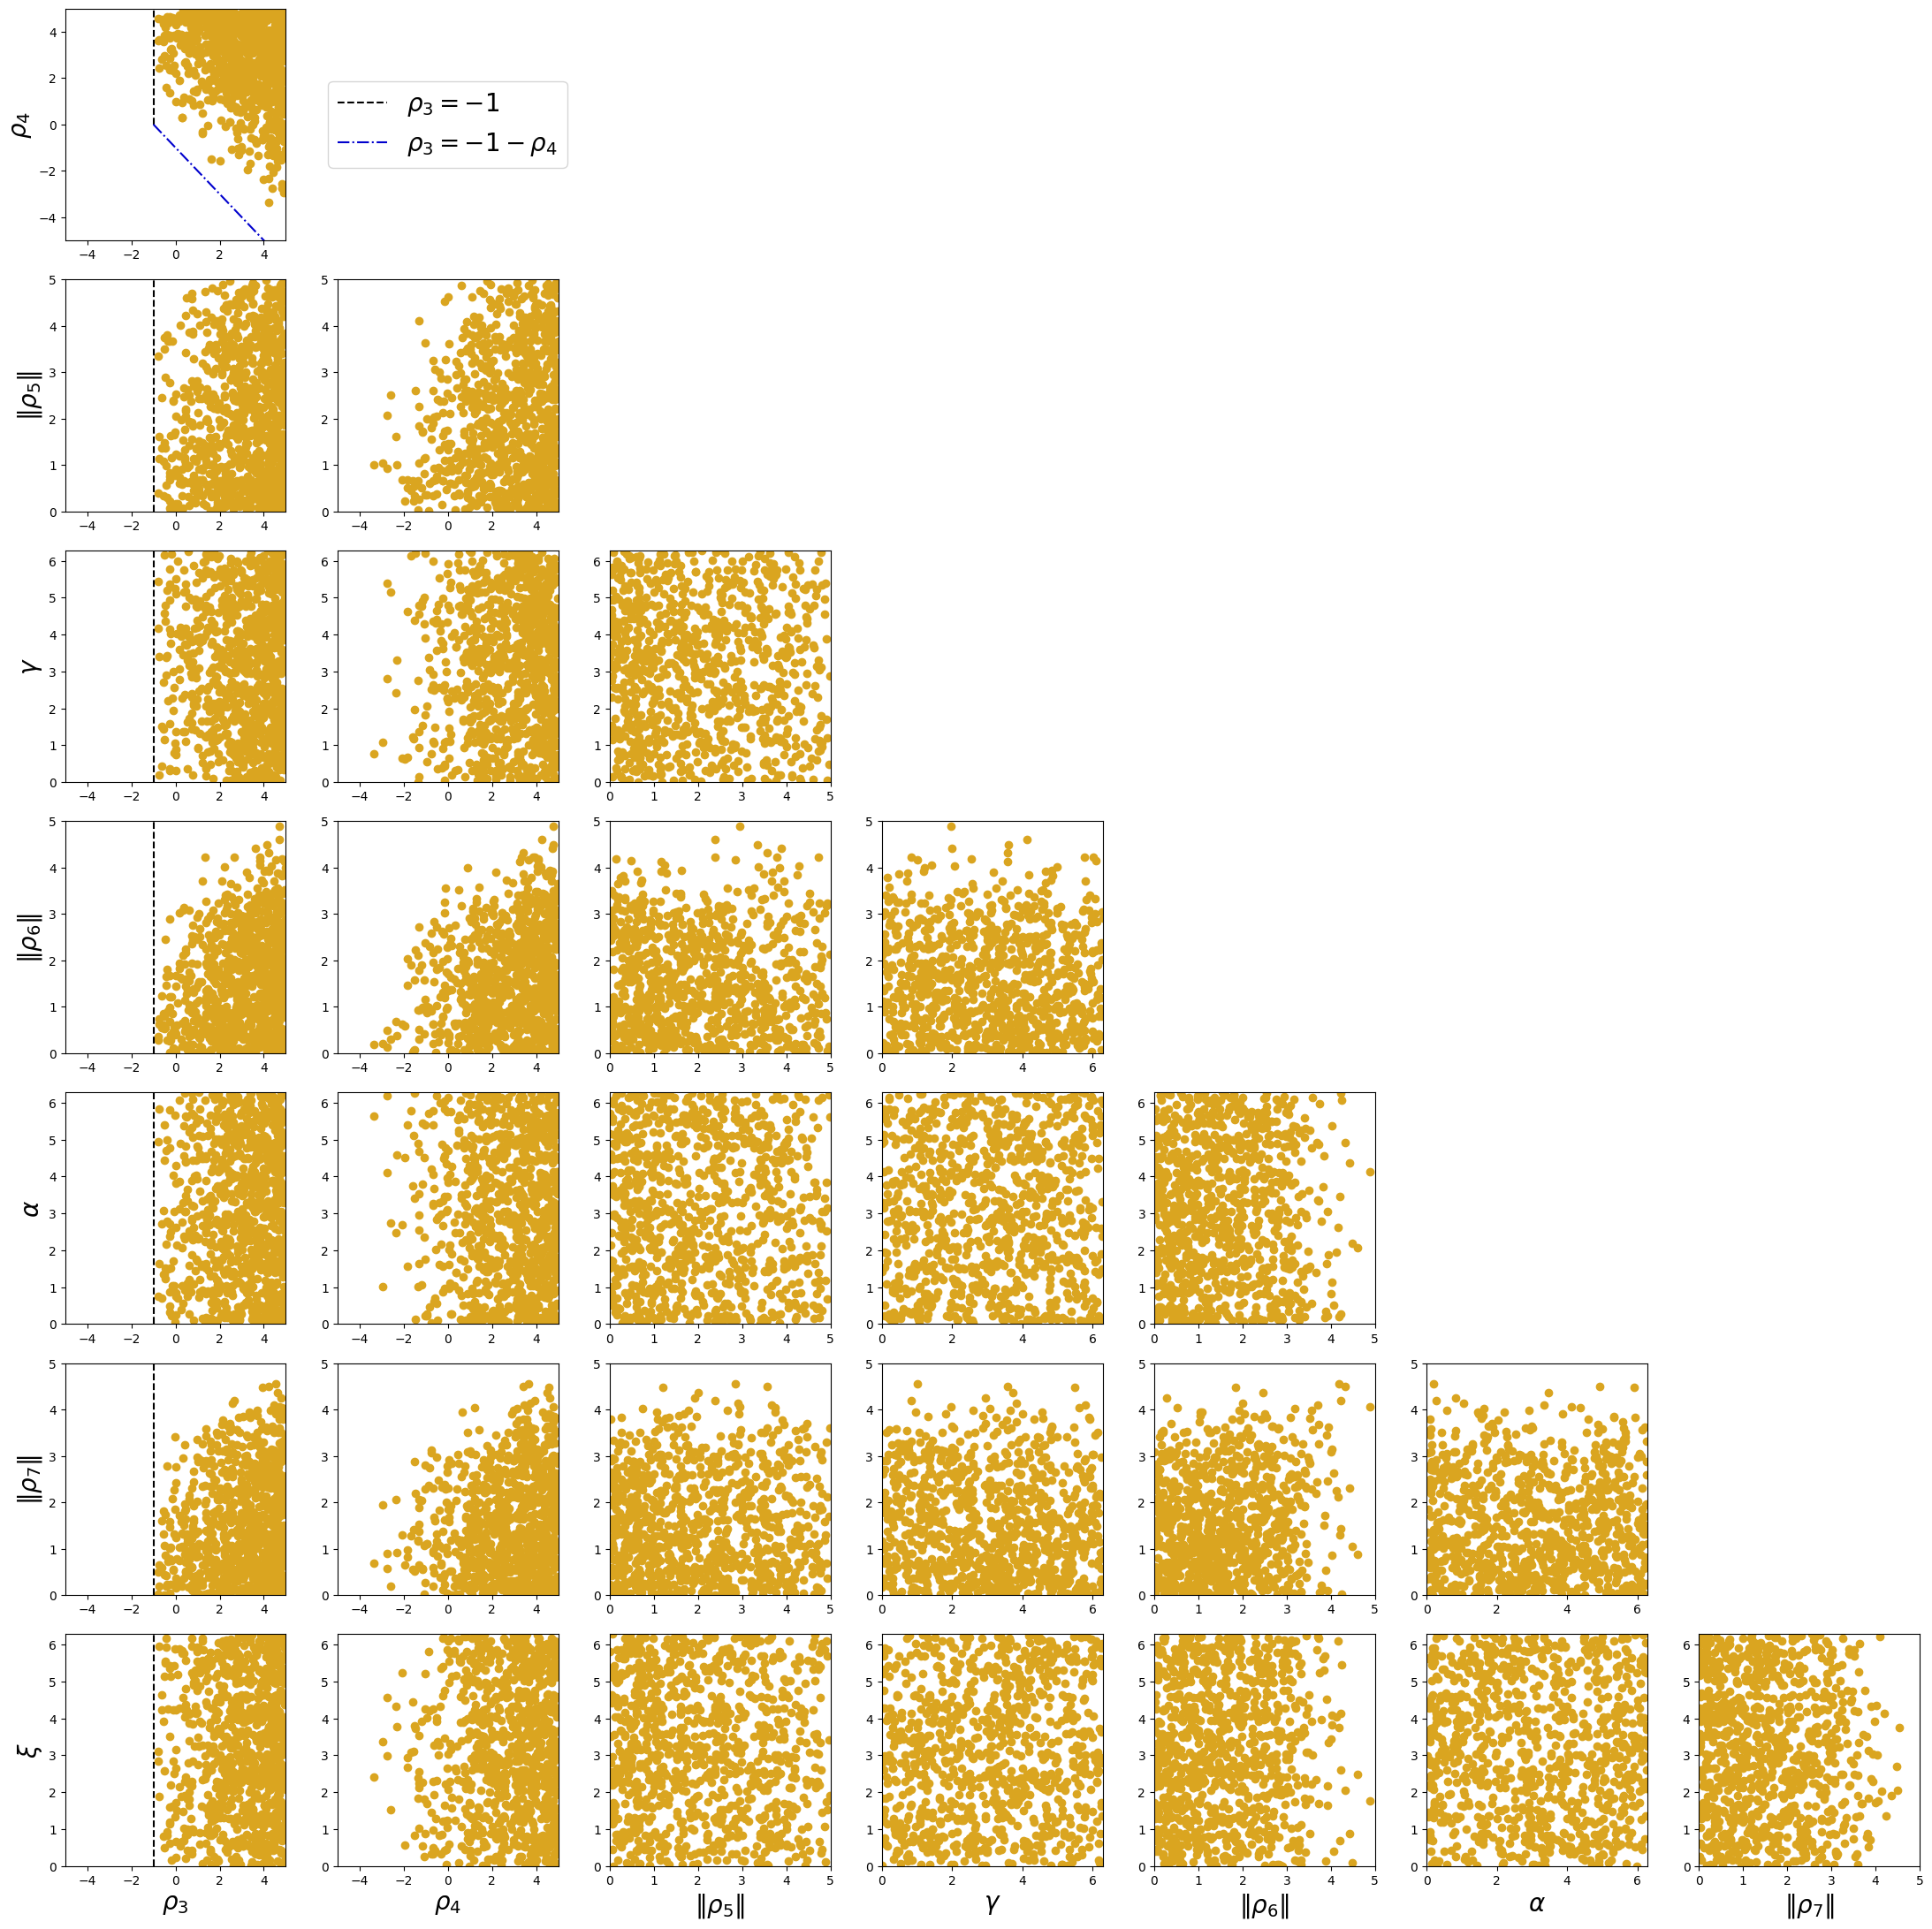

In [35]:
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(8,8,9)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,1], color='goldenrod')

ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='mediumblue',linestyle='-.')

ax = fig.add_subplot(8,8,17)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,2],color='goldenrod')

ax.set_ylabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,18)

ax.scatter(Z2_violating_valid_values[:,1], Z2_violating_valid_values[:,2],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,25)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,3],color='goldenrod')

ax.set_ylabel(r'$\gamma$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,26)

ax.scatter(Z2_violating_valid_values[:,1], Z2_violating_valid_values[:,3],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,27)

ax.scatter(Z2_violating_valid_values[:,2], Z2_violating_valid_values[:,3],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,33)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,4],color='goldenrod')

ax.set_ylabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,34)

ax.scatter(Z2_violating_valid_values[:,1], Z2_violating_valid_values[:,4],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,35)

ax.scatter(Z2_violating_valid_values[:,2], Z2_violating_valid_values[:,4],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,36)

ax.scatter(Z2_violating_valid_values[:,3], Z2_violating_valid_values[:,4],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,41)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,5],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
ax.set_ylabel(r'$\alpha$',fontsize=20)
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,42)

ax.scatter(Z2_violating_valid_values[:,1], Z2_violating_valid_values[:,5],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,43)

ax.scatter(Z2_violating_valid_values[:,2], Z2_violating_valid_values[:,5],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,44)

ax.scatter(Z2_violating_valid_values[:,3], Z2_violating_valid_values[:,5],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,45)

ax.scatter(Z2_violating_valid_values[:,4], Z2_violating_valid_values[:,5],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,49)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,6],color='goldenrod')

ax.set_ylabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,50)

ax.scatter(Z2_violating_valid_values[:,1], Z2_violating_valid_values[:,6],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,51)

ax.scatter(Z2_violating_valid_values[:,2], Z2_violating_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,52)

ax.scatter(Z2_violating_valid_values[:,3], Z2_violating_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,53)

ax.scatter(Z2_violating_valid_values[:,4], Z2_violating_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,54)

ax.scatter(Z2_violating_valid_values[:,5], Z2_violating_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,57)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\xi$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,58)

ax.scatter(Z2_violating_valid_values[:,1], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,59)

ax.scatter(Z2_violating_valid_values[:,2], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,60)

ax.scatter(Z2_violating_valid_values[:,3], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\gamma$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,61)

ax.scatter(Z2_violating_valid_values[:,4], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,62)

ax.scatter(Z2_violating_valid_values[:,5], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\alpha$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,63)

ax.scatter(Z2_violating_valid_values[:,6], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,10)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='mediumblue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center', fontsize=20)
ax.axis('off')


plt.tight_layout()  
plt.show()

In [36]:
# Explore Z_2-violating 2HDM results with rho_3<-1 (these values are impossible in the 2HDM with Z_2 symmetry)

dim = 1000

regions = [(-10, -1),         # rho_3
           (-10, 10),         # rho_4
           (0, 10),          # |rho_5|
           (0, 2*np.pi),    # gamma
           (0, 10),          # |rho_6|
           (0, 2*np.pi),    # alpha
           (0, 10),          # |rho_7|
           (0, 2*np.pi)]    # xi

# Generate random parameters
parameters = generate_random_params(dim, regions)

# Minimize the function and filter the results with V > 0
results = np.array(minimize_dependent_params(parameters, function_variable_regions))
Z2_violating_negative_rho3_valid_value = results[results[:, -1] > 0]
Z2_violating_negative_rho3_valid_value

# The array is empty. Hence, no valid values have been found.

array([], shape=(0, 12), dtype=float64)

# Symmetric 2HDM potential 

In [37]:
# Explore Symmetric Z_2-violating 2HDM results

dim = 100
rho_3 = np.random.default_rng().uniform(-5,5,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_6 = np.random.default_rng().uniform(0,5,dim) #rho_6 = rho_7 and alpha = xi in order to assure rho_eff_6 = rho_eff_7 (alpha and xi can differ by a multiple of 2*pi, but this fact has no impact on the following figures)
alpha = np.random.default_rng().uniform(0,2*np.pi,dim) #rho_6 = rho_7 and alpha = xi in order to assure rho_eff_6 = rho_eff_7 (alpha and xi can differ by a multiple of 2*pi, but this fact has no impact on the following figures)
rho_7 = rho_6
xi = alpha
#
symmetric_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))
symmetric_valid_values

[[4.7615988382172,
  2.9271403425831997,
  0.8828589346336285,
  3.563956457663106,
  2.201214868553814,
  1.0838231880506393,
  2.201214868553814,
  1.0838231880506393,
  1.2811260427253306],
 [3.0020114971242453,
  1.8286004956106954,
  3.2335354024190828,
  5.1023264917589835,
  0.5175817402813593,
  2.480761538381707,
  0.5175817402813593,
  2.480761538381707,
  1.961159790822982],
 [1.1986123965236075,
  3.6880098507375543,
  1.4966315941099007,
  4.817333587624796,
  1.3573847209908563,
  2.2572210242727584,
  1.3573847209908563,
  2.2572210242727584,
  1.6485710490804386],
 [4.717102219656983,
  2.812005894700608,
  4.200635538364263,
  4.578963410608476,
  2.7308790030611685,
  5.055190569976501,
  2.7308790030611685,
  5.055190569976501,
  0.9745091648291222],
 [4.947675774163793,
  3.9915415885396737,
  2.7963476773056084,
  2.6424523925414114,
  2.8505528965165787,
  3.277929110332109,
  2.8505528965165787,
  3.277929110332109,
  0.5489048920806305],
 [3.6282032504550354,
  

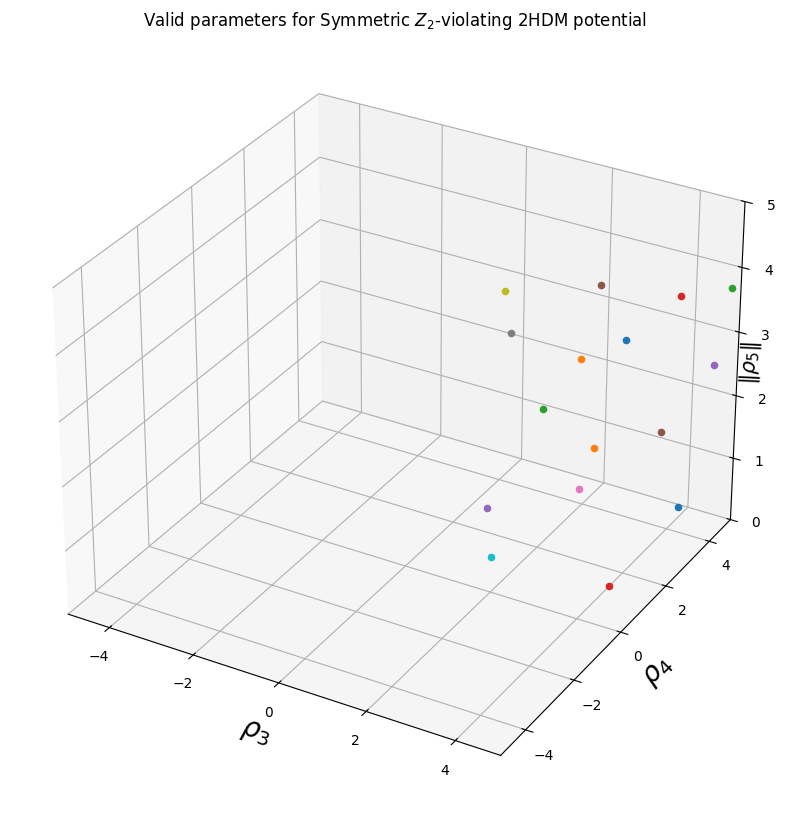

In [46]:
# Plot of the results
# Even though in this example all the parameters are studied at once, only the region rho_3, rho_4, rho_5 is shown.

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(symmetric_valid_values)-1,len(symmetric_valid_values)):
    #
    ax.scatter(symmetric_valid_values[int(point)][0],symmetric_valid_values[int(point)][1],symmetric_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_zlabel(r'$\|\rho_{5}\|$',fontsize=15, rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title(r'Valid parameters for Symmetric $Z_2$-violating 2HDM potential')

plt.show()

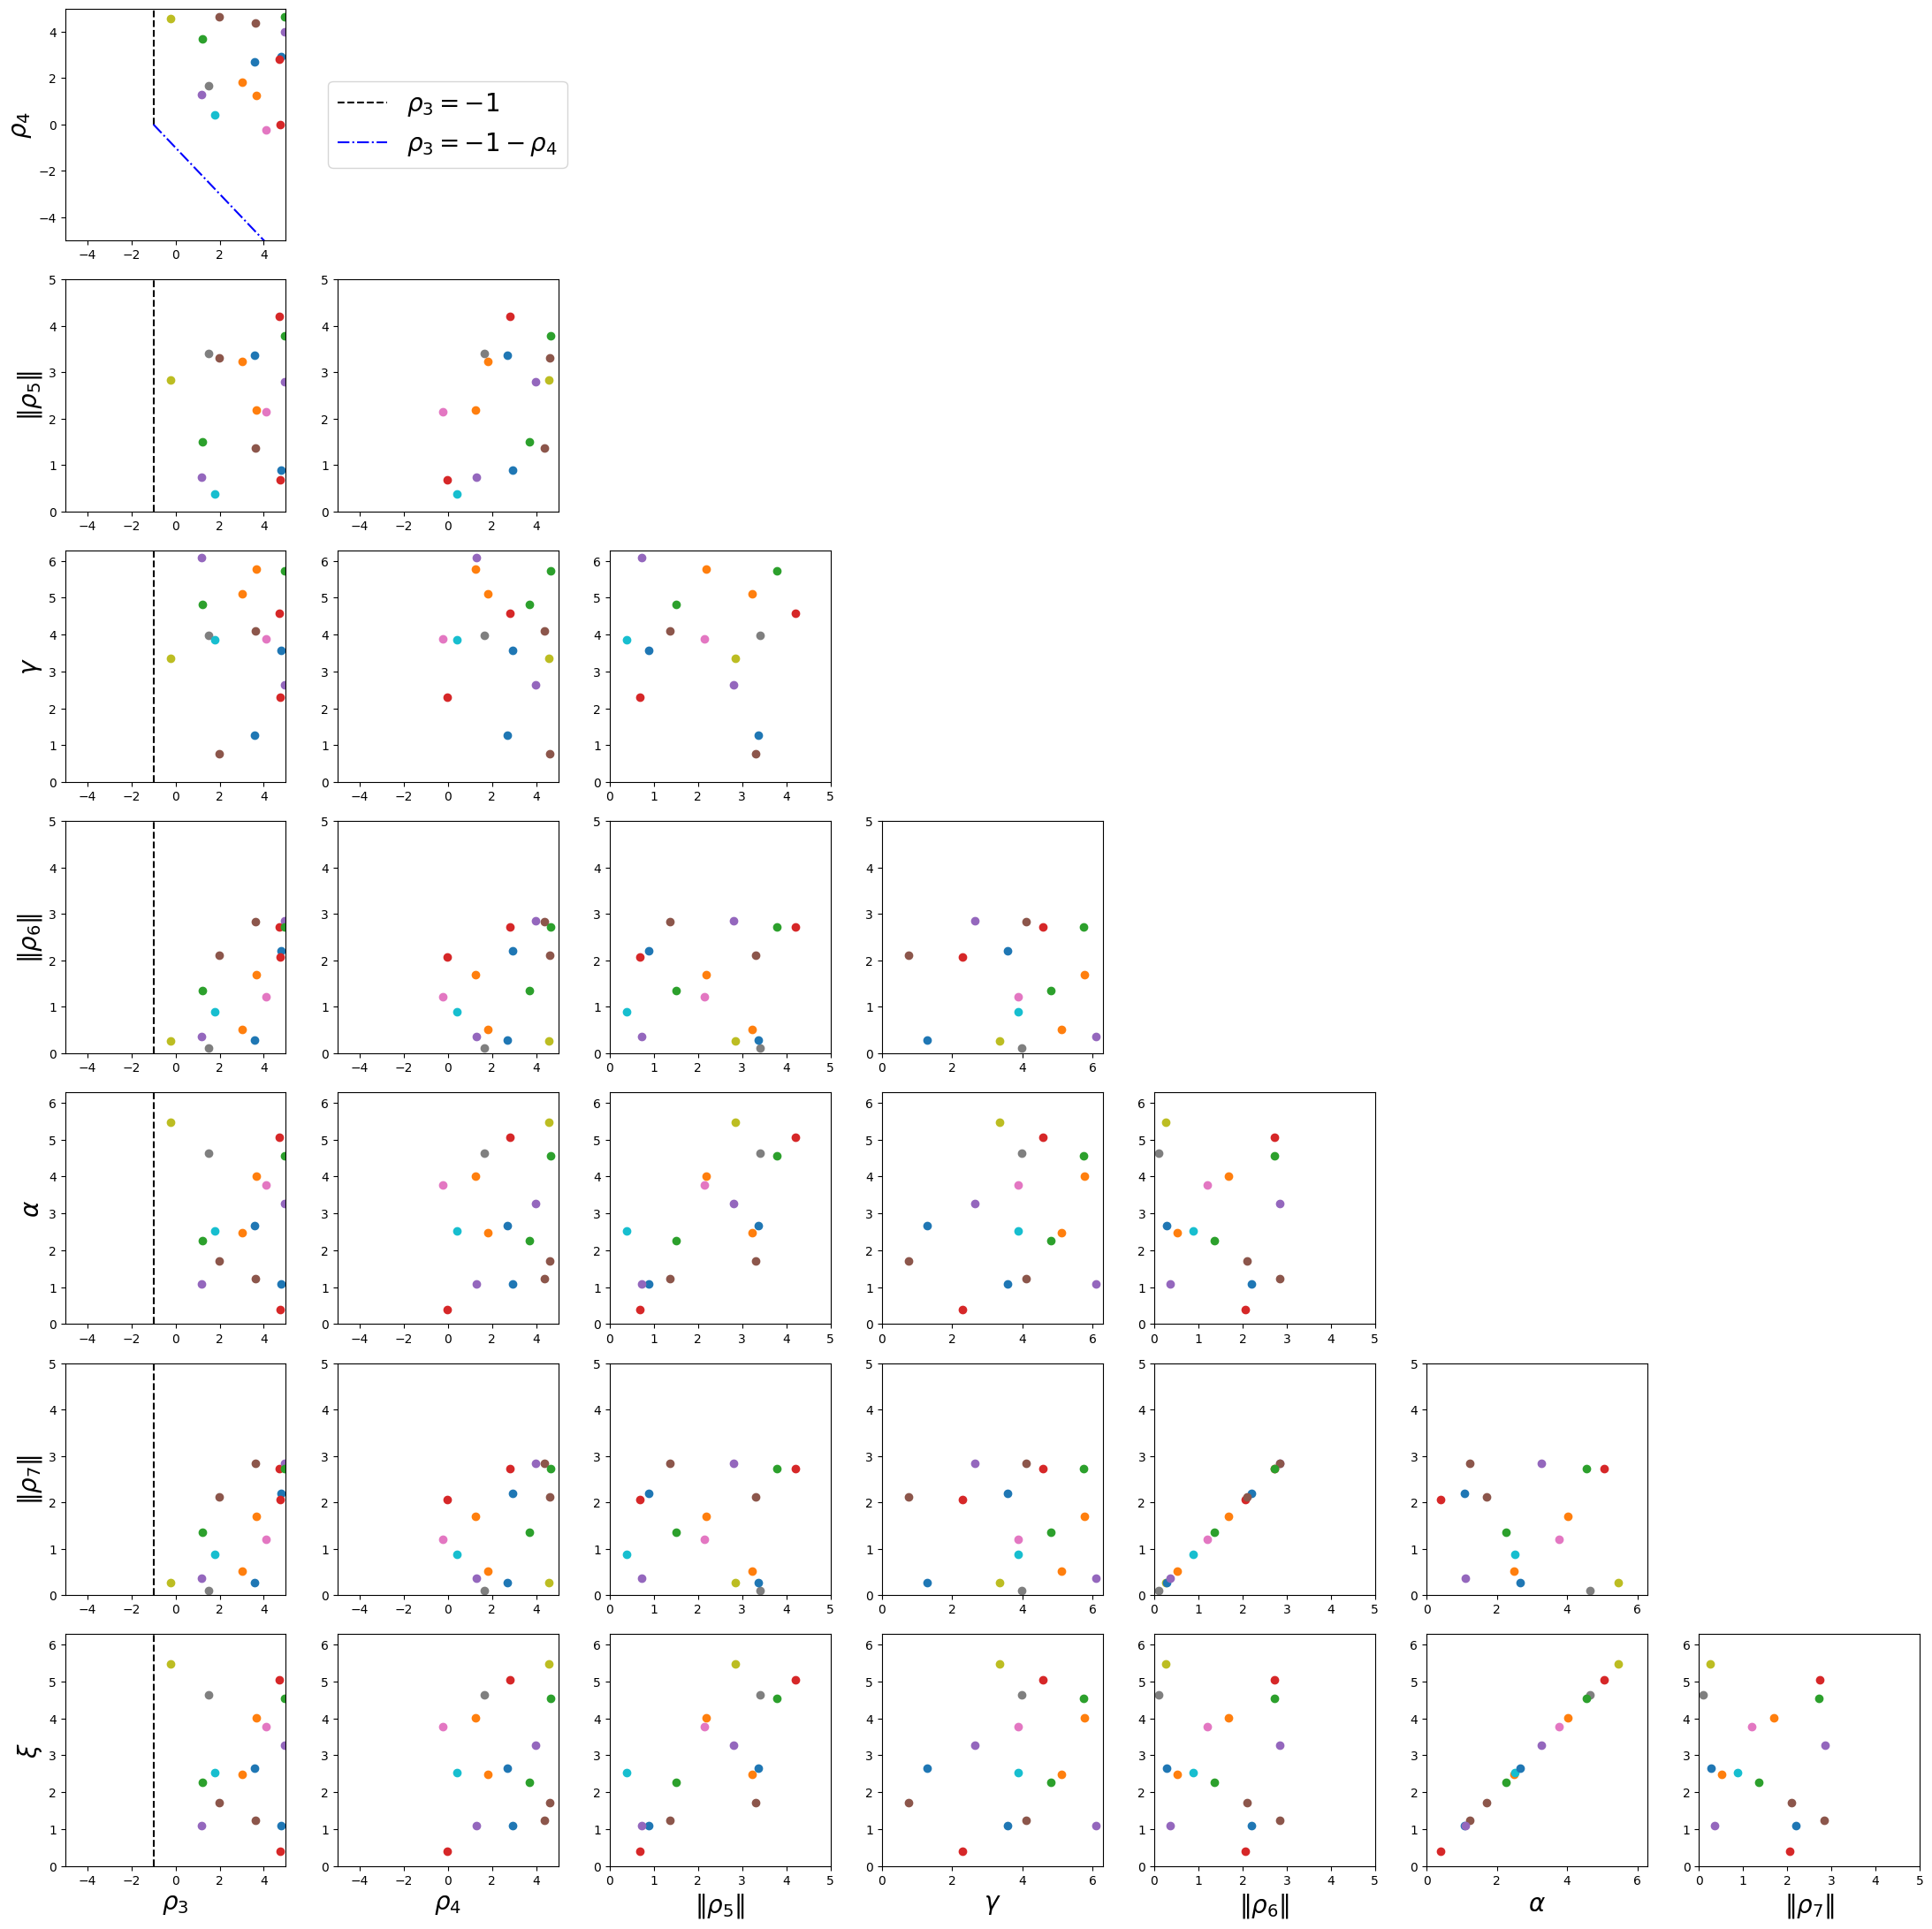

In [39]:
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(8,8,9)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][1])

ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax = fig.add_subplot(8,8,17)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][2])

ax.set_ylabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,18)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][1], symmetric_valid_values[int(point)][2])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,25)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][3])

ax.set_ylabel(r'$\gamma$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,26)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][1], symmetric_valid_values[int(point)][3])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,27)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][2], symmetric_valid_values[int(point)][3])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,33)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][4])

ax.set_ylabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,34)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][1], symmetric_valid_values[int(point)][4])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,35)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][2], symmetric_valid_values[int(point)][4])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,36)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][3], symmetric_valid_values[int(point)][4])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,41)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][5])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
ax.set_ylabel(r'$\alpha$',fontsize=20)
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,42)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][1], symmetric_valid_values[int(point)][5])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,43)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][2], symmetric_valid_values[int(point)][5])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,44)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][3], symmetric_valid_values[int(point)][5])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,45)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][4], symmetric_valid_values[int(point)][5])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,49)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][6])

ax.set_ylabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,50)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][1], symmetric_valid_values[int(point)][6])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,51)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][2], symmetric_valid_values[int(point)][6])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,52)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][3], symmetric_valid_values[int(point)][6])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,53)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][4], symmetric_valid_values[int(point)][6])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,54)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][5], symmetric_valid_values[int(point)][6])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,57)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\xi$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,58)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][1], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,59)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][2], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,60)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][3], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\gamma$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,61)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][4], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,62)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][5], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\alpha$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,63)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][6], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,10)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center', fontsize=20)
ax.axis('off')


plt.tight_layout()  
plt.show()

# Antisymmetric 2HDM potential

In [40]:
# Explore Symmetric Z_2-violating 2HDM results

dim = 100
rho_3 = np.random.default_rng().uniform(-5,5,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_6 = np.random.default_rng().uniform(0,5,dim) #rho_6 = rho_7 and xi = alpha + pi in order to assure rho_eff_6 + rho_eff_7 = 0 
alpha = np.random.default_rng().uniform(0,2*np.pi,dim) #rho_6 = rho_7 and alpha + pi in order to assure rho_eff_6 + rho_eff_7 = 0 
rho_7 = rho_6
xi = alpha + np.pi
#
antisymmetric_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))
antisymmetric_valid_values

[[0.8116461128529018,
  0.9168789983207262,
  1.884774761056009,
  3.121295437795862,
  0.706595441254777,
  1.174328046394649,
  0.706595441254777,
  4.315920699984442,
  0.7829817562924098],
 [0.049889795079092636,
  3.472280273857157,
  1.46628924310874,
  4.210753970092419,
  2.445505111064505,
  5.7535454721781125,
  2.445505111064505,
  8.895138125767906,
  0.5862505501548281],
 [3.026480062900692,
  2.906654218484154,
  1.3635502159515238,
  4.367496327144729,
  3.654896213071426,
  2.799003771904295,
  3.654896213071426,
  5.940596425494088,
  0.10499262667792397],
 [4.9889374831809885,
  4.497143220723551,
  4.9401932632513255,
  1.4858849384063064,
  2.209652116559495,
  2.6999088528592745,
  2.209652116559495,
  5.841501506449068,
  1.027433760622335],
 [-0.9930866606291247,
  4.908951359836092,
  0.9661985126098588,
  2.68855384513071,
  1.3125507919817936,
  3.245671029964387,
  1.3125507919817936,
  6.38726368355418,
  0.008930292029580194],
 [-0.3543598701382775,
  4.158

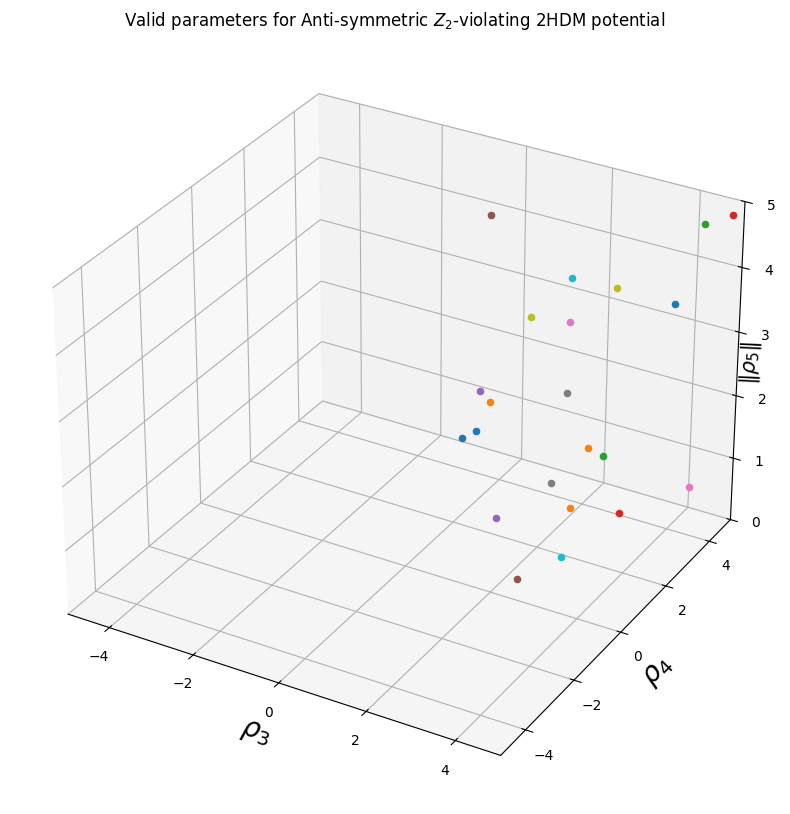

In [45]:
# Plot of the results
# Even though in this example all the parameters are studied at once, only the region rho_3, rho_4, rho_5 is shown.

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(antisymmetric_valid_values)-1,len(antisymmetric_valid_values)):
    #
    ax.scatter(antisymmetric_valid_values[int(point)][0],antisymmetric_valid_values[int(point)][1],antisymmetric_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_zlabel(r'$\|\rho_{5}\|$',fontsize=15, rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title(r'Valid parameters for Anti-symmetric $Z_2$-violating 2HDM potential')

plt.show()

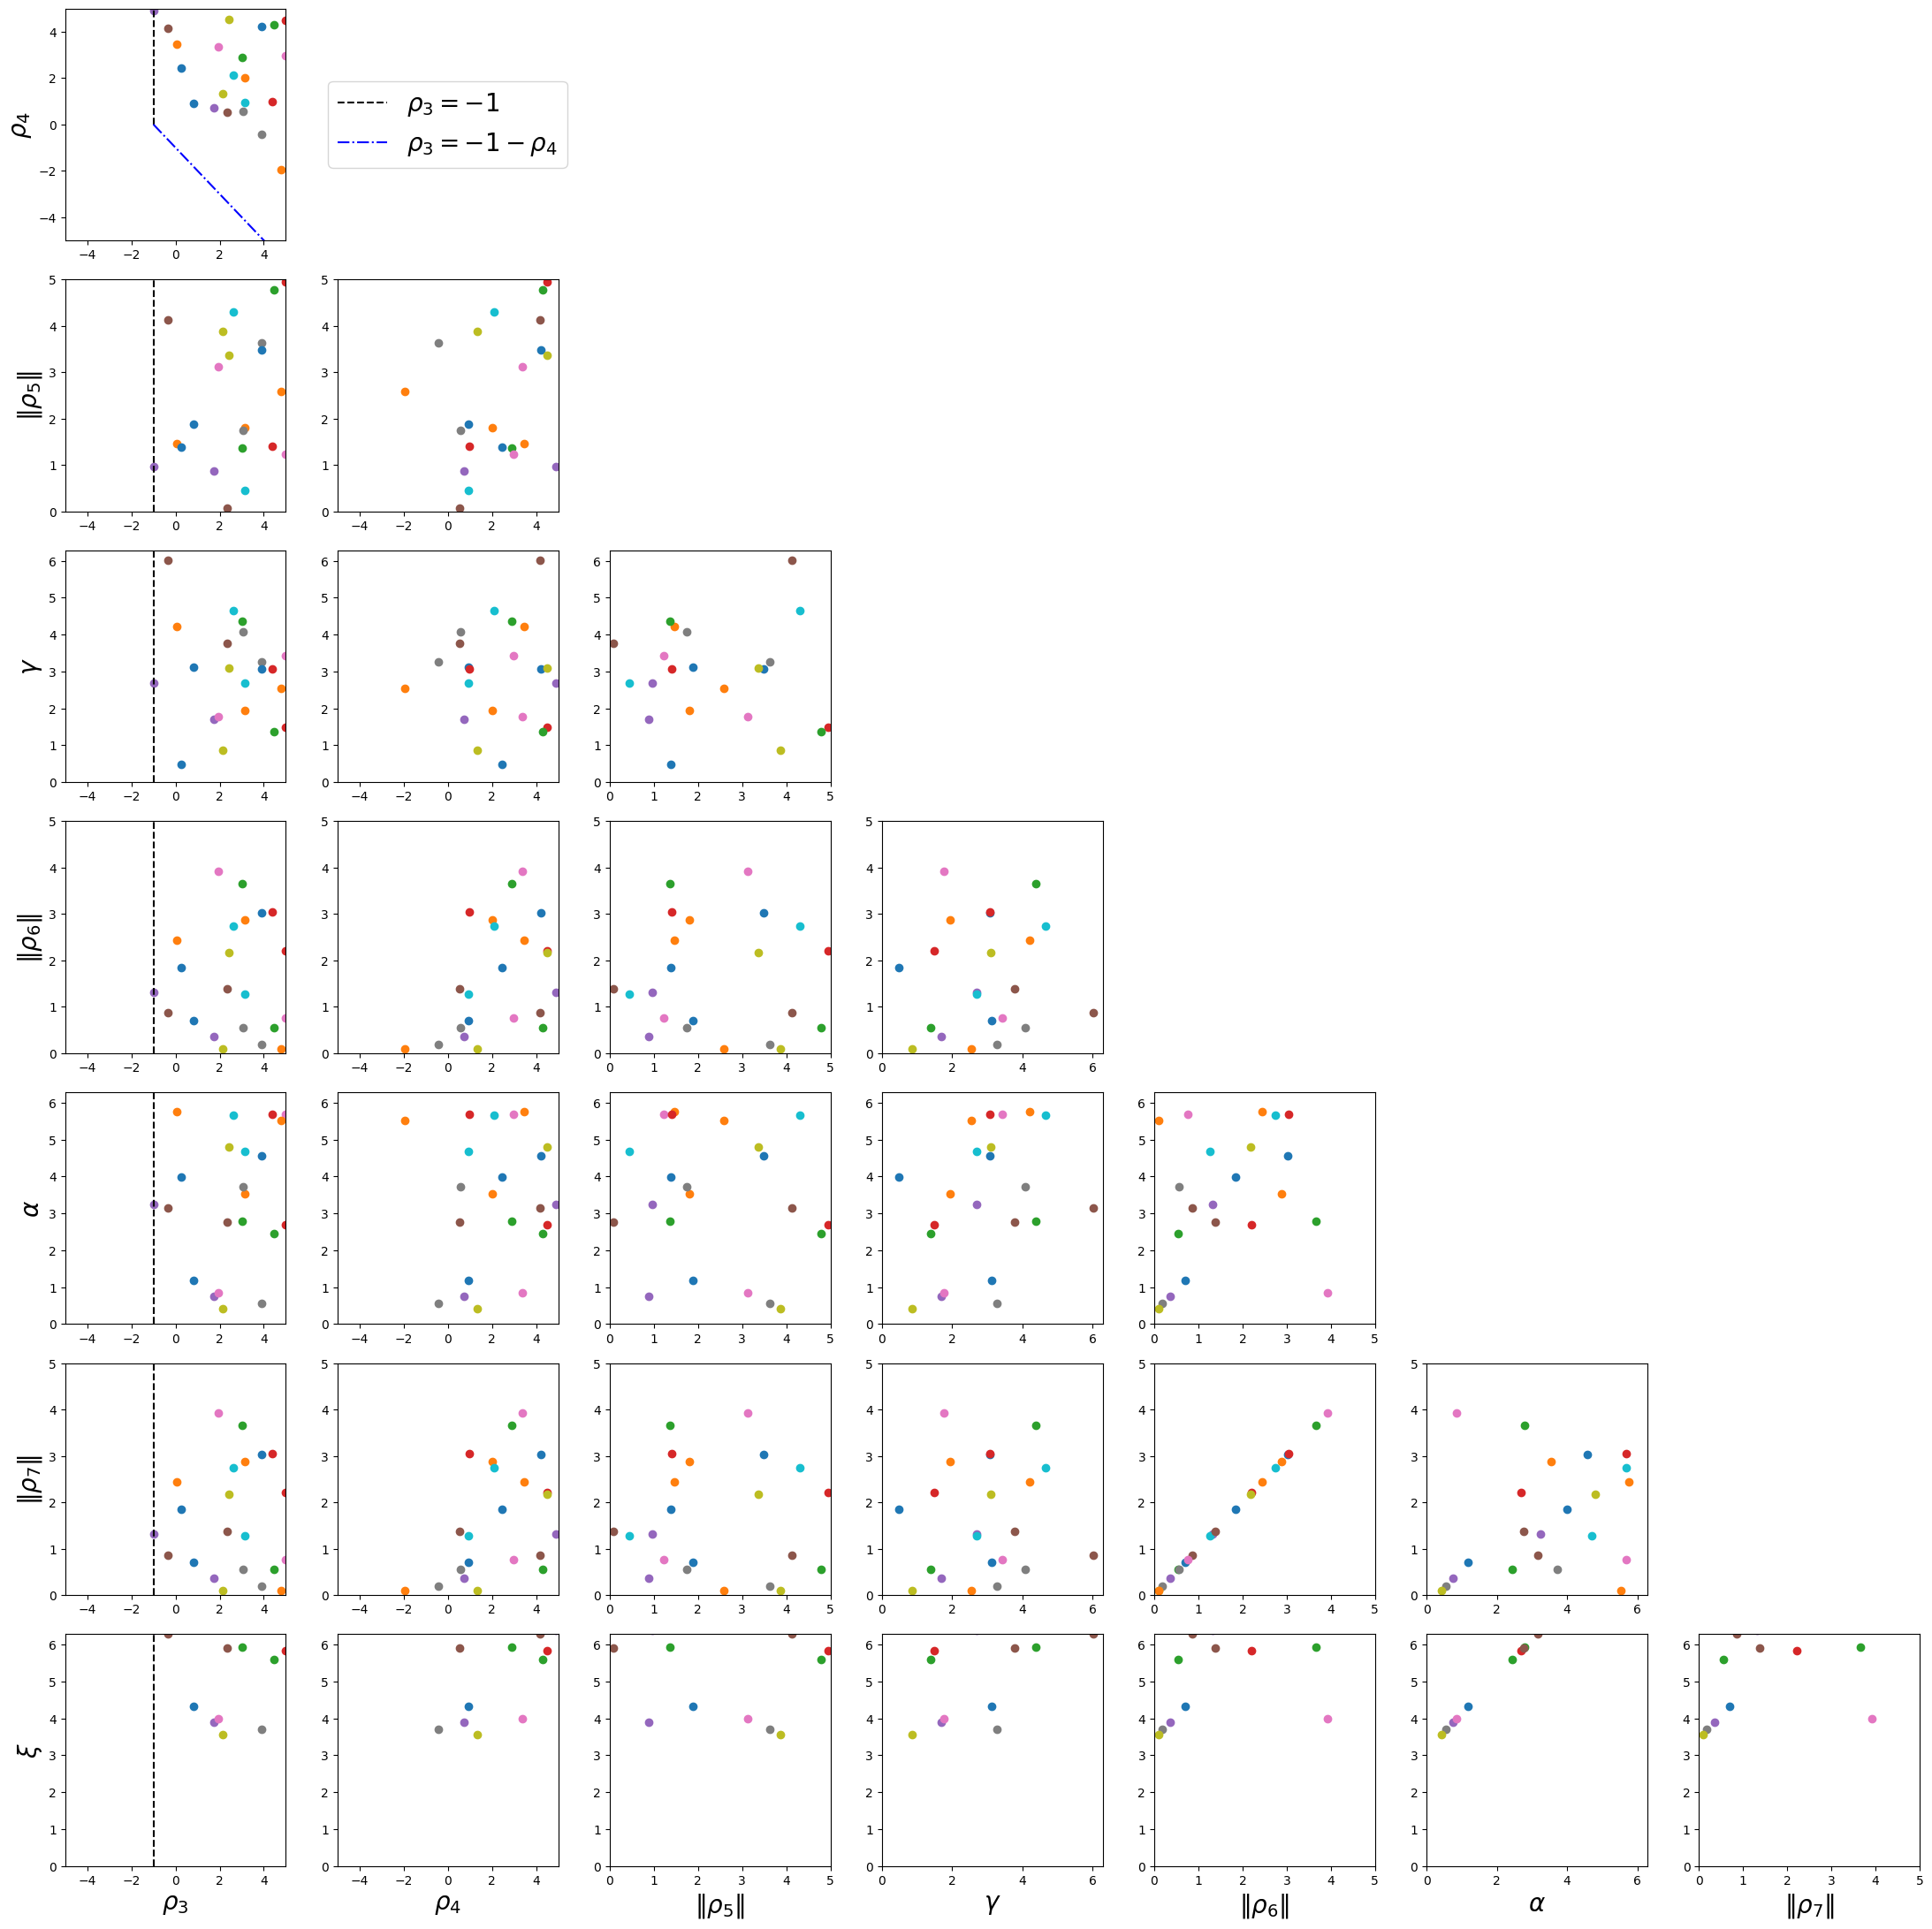

In [42]:
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(8,8,9)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][1])

ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax = fig.add_subplot(8,8,17)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][2])

ax.set_ylabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,18)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][1], antisymmetric_valid_values[int(point)][2])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,25)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][3])

ax.set_ylabel(r'$\gamma$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,26)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][1], antisymmetric_valid_values[int(point)][3])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,27)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][2], antisymmetric_valid_values[int(point)][3])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,33)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][4])

ax.set_ylabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,34)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][1], antisymmetric_valid_values[int(point)][4])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,35)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][2], antisymmetric_valid_values[int(point)][4])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,36)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][3], antisymmetric_valid_values[int(point)][4])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,41)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][5])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
ax.set_ylabel(r'$\alpha$',fontsize=20)
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,42)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][1], antisymmetric_valid_values[int(point)][5])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,43)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][2], antisymmetric_valid_values[int(point)][5])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,44)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][3], antisymmetric_valid_values[int(point)][5])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,45)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][4], antisymmetric_valid_values[int(point)][5])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,49)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][6])

ax.set_ylabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,50)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][1], antisymmetric_valid_values[int(point)][6])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,51)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][2], antisymmetric_valid_values[int(point)][6])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,52)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][3], antisymmetric_valid_values[int(point)][6])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,53)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][4], antisymmetric_valid_values[int(point)][6])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,54)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][5], antisymmetric_valid_values[int(point)][6])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,57)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\xi$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,58)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][1], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,59)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][2], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,60)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][3], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\gamma$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,61)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][4], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,62)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][5], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\alpha$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,63)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][6], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,10)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center', fontsize=20)
ax.axis('off')


plt.tight_layout()  
plt.show()